In [122]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph, analysis
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer, NetworkAnalysis

/Users/Brett/Dropbox/Code/bricolage-dev


In [124]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
import bisect
from IPython.display import Image

In [4]:
def show_network(n, s=True):
    graph.save_network_as_fullgraph(n, name='test', simplify=s)
    return Image(filename='network-test.png', width=400) 

In [5]:
treat = lineage.Treatment("/Users/Brett/Desktop/simple/01-(a-and-not-c)-or-(b-and-c)/")

In [150]:
rep = treat.replicates[15]
lin = rep.get_lineage(readonly=True)
targ = lin.targets[0]
flow = [0, 0, 1]

In [151]:
pf = analysis.make_population_frame(lin.population, targ, flow)
pf.describe()

,fitness,cuts,M1,M2,M3,M4,M5,M6,M7,M8,C1,C2,C3,C4,C5,C6,C7,C8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.986625,1.030000,0.985608,0.185706,0,0.945288,0.046570,0.382645,0.267710,0.971980,2.929842,0.049223,0,0.802702,0.017446,0.022492,0.005057,1.870709
std,0.051942,0.182025,0.093536,0.372915,0,0.200269,0.120473,0.405730,0.385226,0.136882,0.277490,0.163158,0,0.632664,0.074605,0.077082,0.057109,0.336203
min,0.666667,1.000000,0.311278,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,0,1.000000,0.000000,0.137925,0.188722,1.000000,3.000000,0.000000,0,1.311278,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0,1.000000,0.000000,1.000000,0.188722,1.000000,3.000000,0.000000,0,1.311278,0.000000,0.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0,2.000000,0.379941,0.746812,0.683882,2.311278


In [152]:
pf.query('C1 == 3').head()

,fitness,cuts,M1,M2,M3,M4,M5,M6,M7,M8,C1,C2,C3,C4,C5,C6,C7,C8
0,1,1,1,0,0,1,0,0.000000,0.000000,1,3,0,0,1.311278,0,0,0,2
1,1,1,1,0,0,1,0,0.000000,0.000000,1,3,0,0,0.000000,0,0,0,2
2,1,1,1,0,0,1,0,0.000000,0.188722,1,3,0,0,0.000000,0,0,0,2
4,1,1,1,0,0,1,0,0.548795,0.000000,1,3,0,0,1.311278,0,0,0,2
5,1,1,1,0,0,1,0,0.548795,0.000000,1,3,0,0,1.311278,0,0,0,2


1.0
saving test


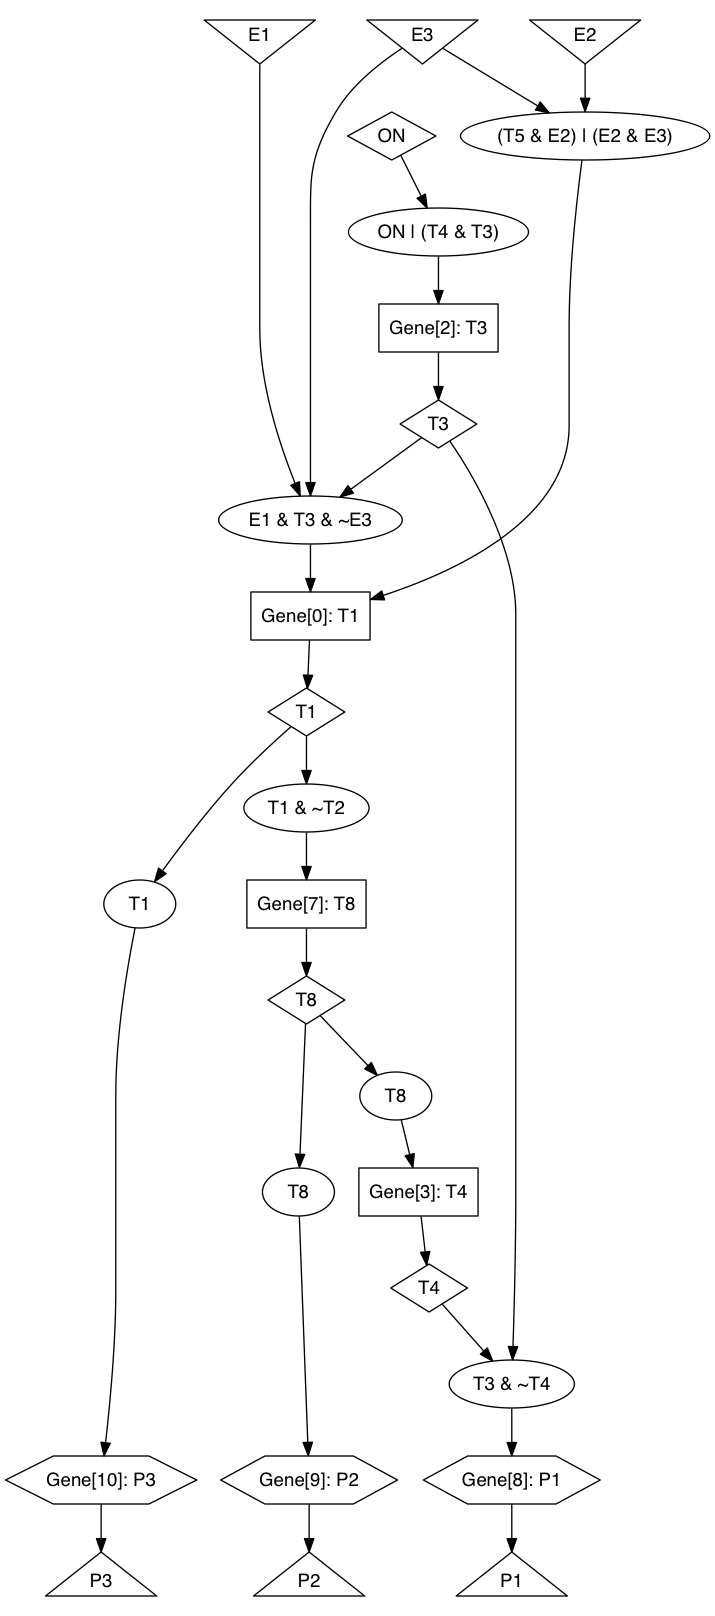

In [153]:
net = lin.population[0]
print net.fitness
show_network(net)

In [154]:
anc = lin.get_ancestry(net.identifier)
ff, mf, cf = analysis.make_ancestry_frames(anc, targ, flow)

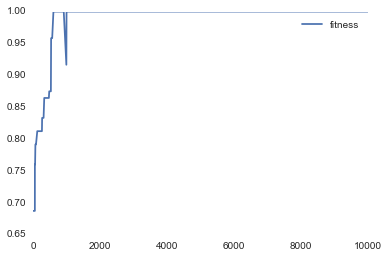

In [155]:
ff.plot()

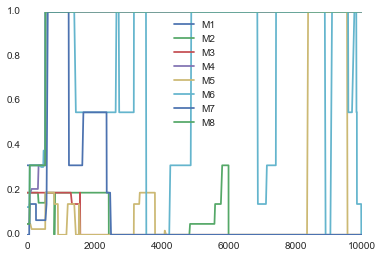

In [156]:
mf.plot()

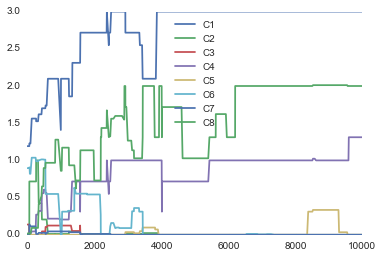

In [157]:
cf.plot()

In [21]:
cuts = analysis.make_cut_frame(anc)

In [126]:
bestc = cf.max(axis=1)
bestc.name = 'C'
bestm = mf.max(axis=1)
bestm.name = 'M'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a0e7cd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119a77710>], dtype=object)

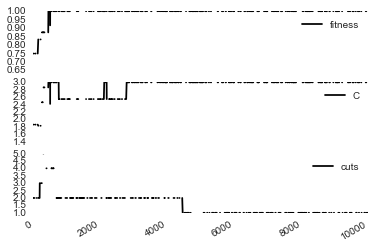

In [127]:
q = pd.concat([ff, bestc, cuts], axis=1)
q.plot(subplots=True)

In [119]:
mr = analysis.make_ancestry_robustness_frame(anc, targ, sample_size=1000)

(0.7, 0.9)

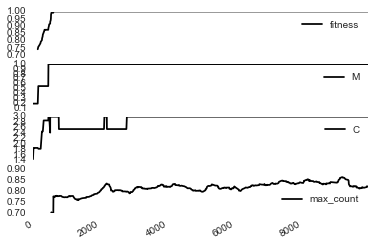

In [128]:
mrr = pd.rolling_mean(mr, 10)
q = pd.concat([mrr, bestc, bestm], axis=1)
axes = q.plot(y=['fitness', 'M', 'C', 'max_count'], subplots=True)
ax3 = axes[3]
ax3.set_ylim(.7, .9)



In [24]:
cuts.query('cuts == 1').head()

,cuts
4555,1
4567,1
4573,1
4589,1
4591,1


In [21]:
n = anc.network_at_generation(2000)

In [24]:
show_network(n)

NameError: name 'n' is not defined

saving test


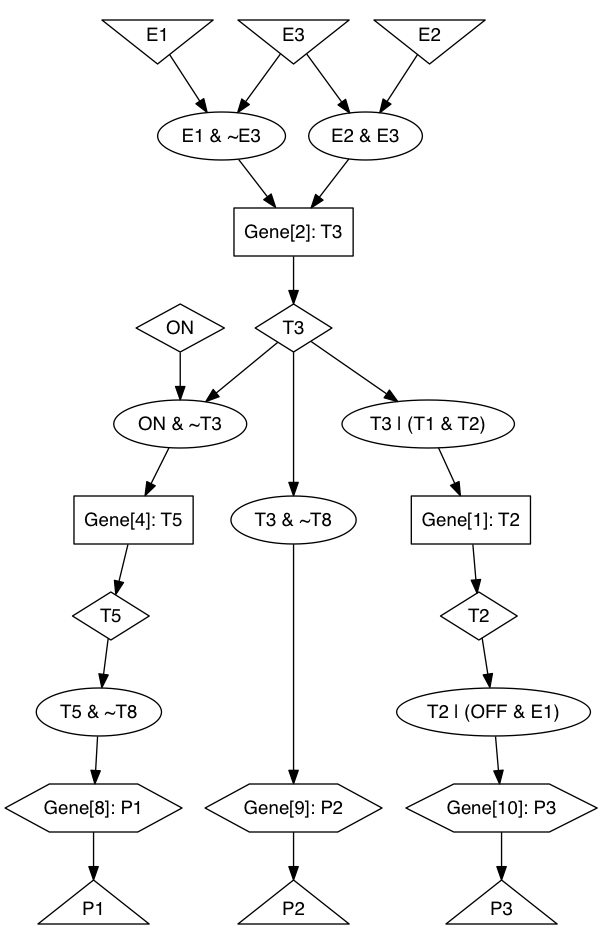

In [138]:
show_network(anc.network_at_generation(8000))

saving test


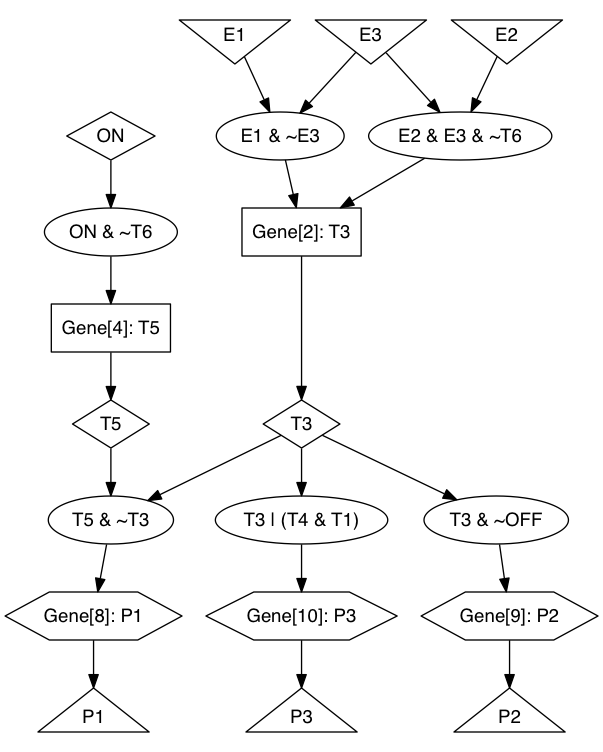

In [139]:
show_network(anc.network_at_generation(10000))

In [23]:
ana = NetworkAnalysis(n)
cg = graph.SignalFlowGraph(ana)
cg.minimum_cut()

{(2, 6), (2, 8), (2, 10), (2, 12)}

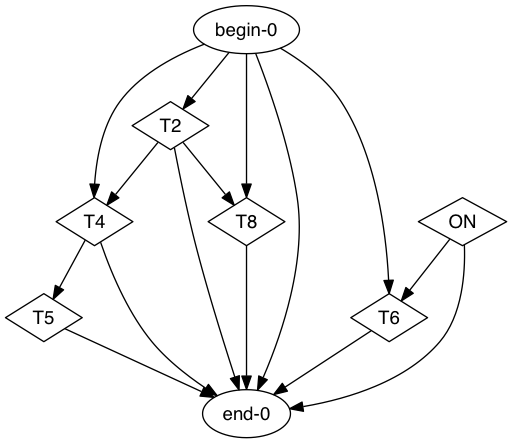

In [25]:
dot = graph.DotMaker(cg)
dot.save_picture('x.png')
Image('x.png')

In [28]:
pc.max()

C1    2.548795
C2    2.002797
C3    1.480178
C4    2.115949
C5    0.634039
C6    2.311278
C7    2.311278
C8    2.548795
dtype: float64

In [129]:
lin.get_generation(2000)

<Population: 1000>

In [130]:
p = _

In [131]:
p

<Population: 1000>

In [160]:
analysis.get_population_neighbourhood_fitness(lin.get_generation(1500), lin.targets[0], sample_per_network=50)

0.95918920601851843

In [161]:
analysis.get_population_neighbourhood_fitness(lin.get_generation(10000), lin.targets[0], sample_per_network=50)

0.95167229298941802